In [1]:
print("""
@Description: Plotting with pandas and seaborn
@Author(s): Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime: 2023-06-22 17:15:34
""")


@Description: Plotting with pandas and seaborn
@Author(s): Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime: 2023-06-22 17:15:34



In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Plotting with pandas and seaborn

### Line Plots

<Axes: >

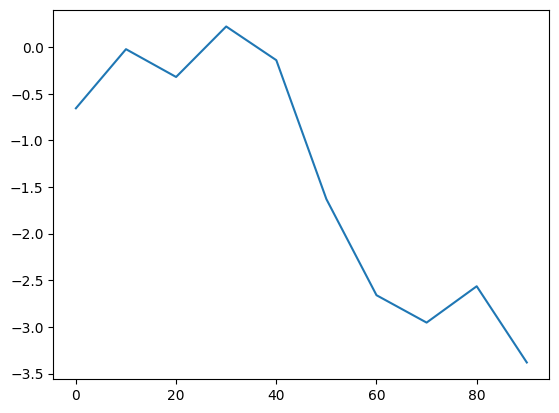

In [11]:
fig = plt.figure()
s = pd.Series(np.random.standard_normal(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

<Axes: >

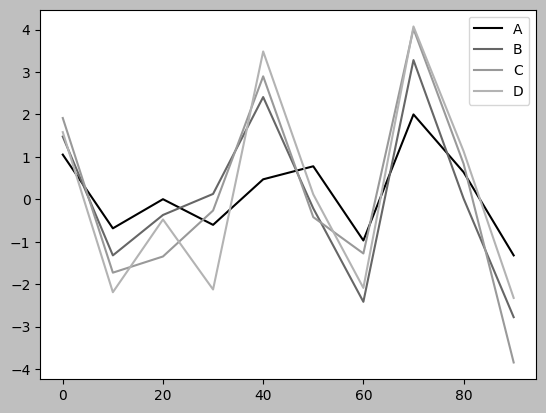

In [15]:
df = pd.DataFrame(np.random.standard_normal(size=(10, 4)).cumsum(axis=1),
                  columns=list('ABCD'), index=np.arange(0, 100, 10))
plt.style.use('grayscale')
df.plot()

### Bar Plots

<Axes: >

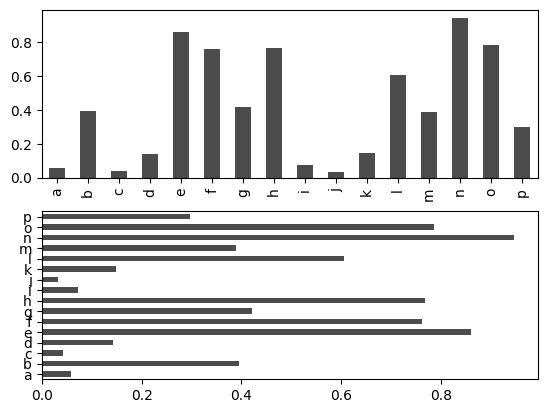

In [26]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.uniform(size=16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='black', alpha=.7)
data.plot.barh(ax=axes[1], color='black', alpha=.7)

In [27]:
plt.rcdefaults()

In [28]:
df = pd.DataFrame(np.random.uniform(size=(6, 4)),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(list('ABCD'), name='Genus'))
df

Genus,A,B,C,D
one,0.412306,0.576443,0.435130,0.009527
two,0.676091,0.824399,0.453721,0.765349
three,0.283661,0.615881,0.113307,0.728260
four,0.908695,0.511215,0.075009,0.699688
five,0.501827,0.408650,0.218335,0.460246
six,0.872418,0.863232,0.888585,0.926652


<Axes: >

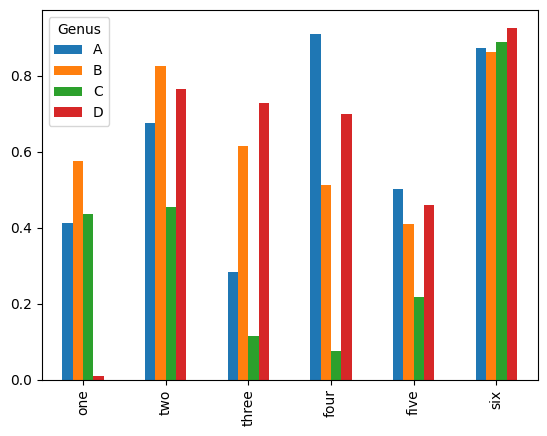

In [29]:
df.plot.bar()

<Axes: >

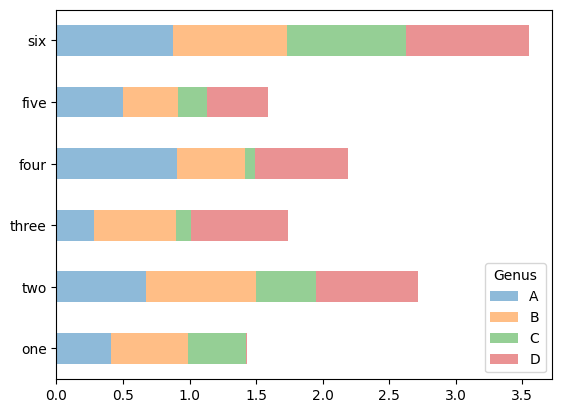

In [31]:
df.plot.barh(stacked=True, alpha=0.5)

In [32]:
tips = pd.read_csv('../Data/tips.csv')
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [36]:
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts = party_counts.reindex(index=['Thur', 'Fri', 'Sat', 'Sun'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Thur,1,48,4,5,1,3
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1


In [37]:
party_counts = party_counts.loc[:, 2:5]
party_counts

size,2,3,4,5
day,,,,
Thur,48,4,5,1
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3


In [40]:
party_pcts = party_counts.div(party_counts.sum(axis='columns'), axis='index')
party_pcts

size,2,3,4,5
day,,,,
Thur,0.827586,0.068966,0.086207,0.017241
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000


<Axes: xlabel='day'>

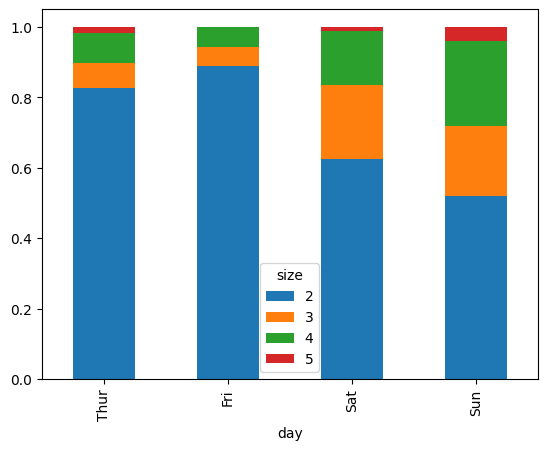

In [41]:
party_pcts.plot.bar(stacked=True)

In [43]:
import seaborn as sns

In [44]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


<Axes: xlabel='tip_pct', ylabel='day'>

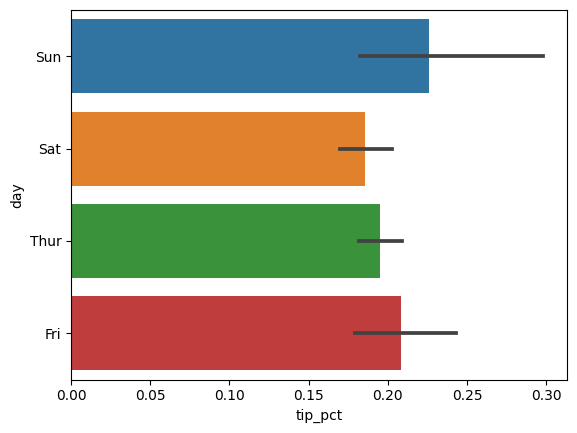

In [51]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')
# tips.groupby('day').agg({'tip_pct': 'mean'})

<Axes: xlabel='tip_pct', ylabel='day'>

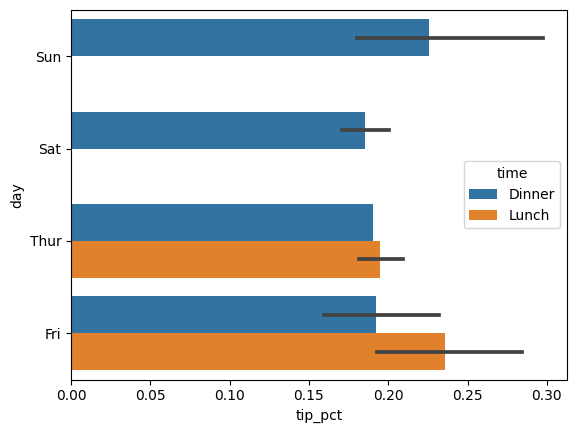

In [53]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

### Histograms and Density Plots

<Axes: ylabel='Frequency'>

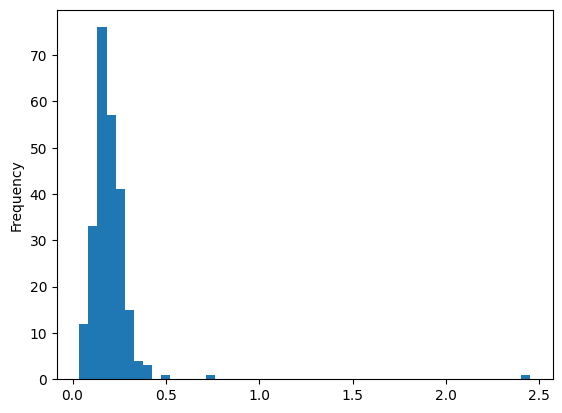

In [55]:
tips['tip_pct'].plot.hist(bins=50)

<Axes: ylabel='Density'>

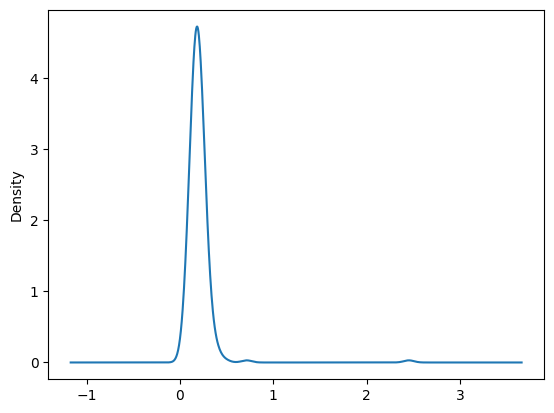

In [58]:
tips['tip_pct'].plot.density()

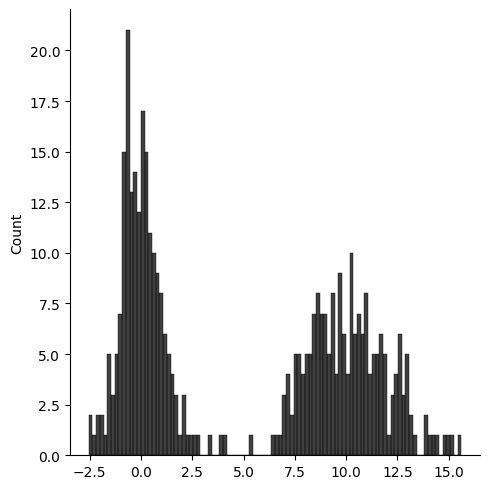

In [69]:
com1 = np.random.standard_normal(200)
com2 = 10 + 2 * np.random.standard_normal(200)
values = pd.Series(np.concatenate([com1, com2]))
sns.histplot(values, bins=100)
# sns.displot(values, bins=100, color='black')

### Scatter or Point Plots

In [65]:
macro = pd.read_csv('../Data/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data.tail()

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


Text(0.5, 1.0, 'Changes in log(m1) versus log(unemp)')

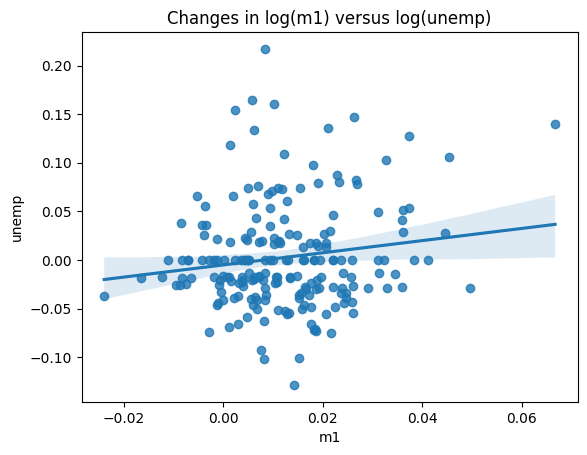

In [72]:
ax = sns.regplot(x='m1', y='unemp', data=trans_data)
ax.set_title('Changes in log(m1) versus log(unemp)')

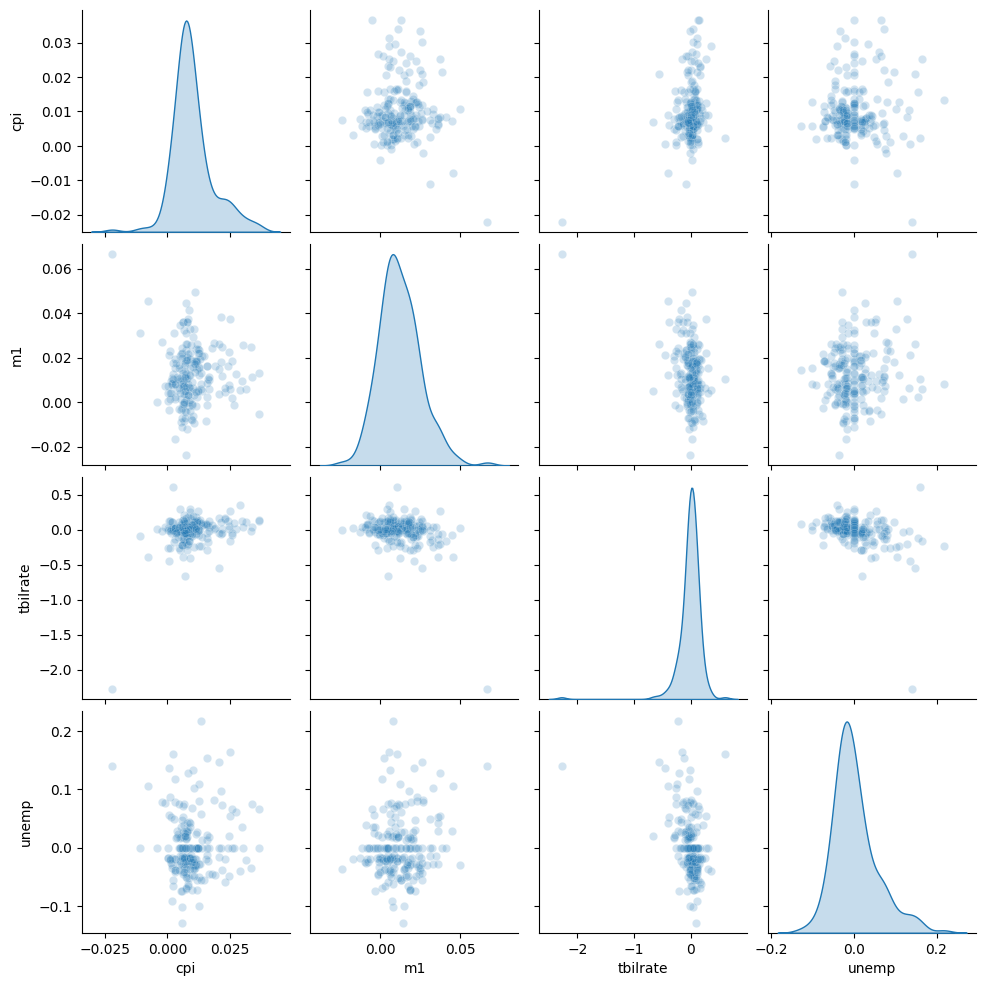

In [73]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': .2})

### Facet Grids and Categorical Data

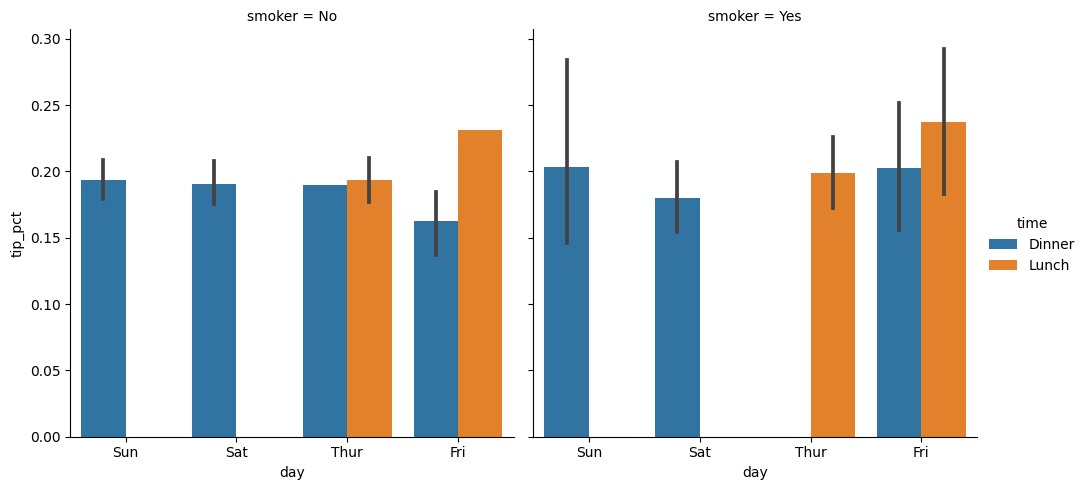

In [75]:
sns.catplot(x='day', y='tip_pct', hue='time', col='smoker',
            kind='bar', data=tips[tips['tip_pct'] < 1])

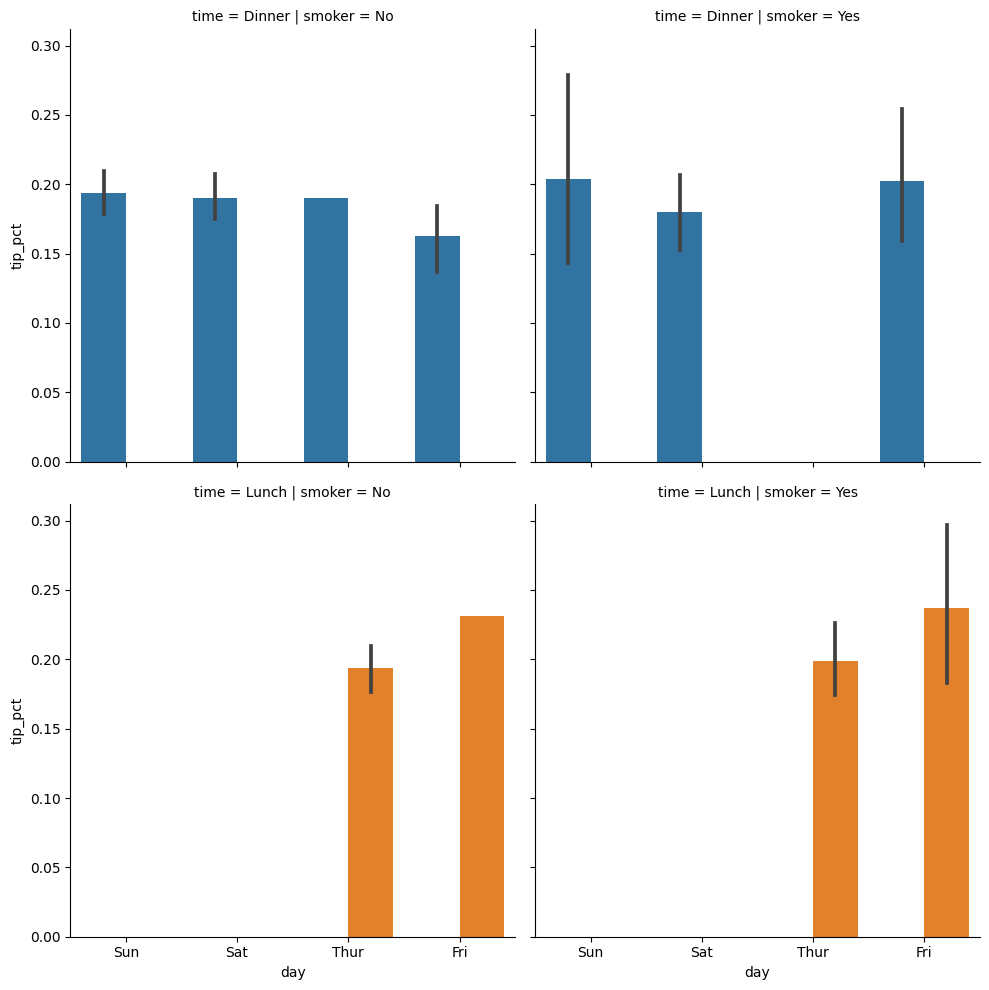

In [76]:
sns.catplot(x='day', y='tip_pct', hue='time', 
            col='smoker', row='time', 
            kind='bar', data=tips[tips['tip_pct'] < 1])

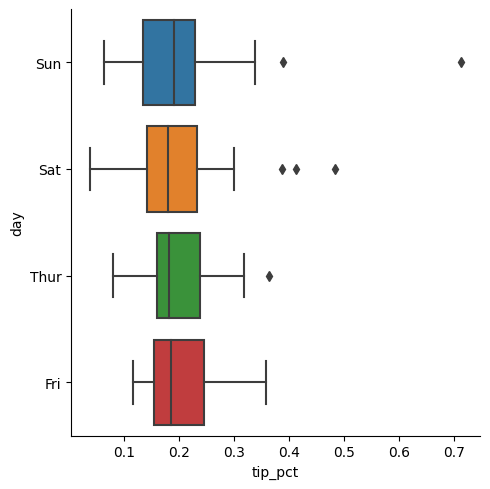

In [78]:
sns.catplot(x='tip_pct', y='day', kind='box',
            data=tips[tips['tip_pct'] < 1])

An excellent book on data visualization is [Fundamentals of Data Visualization](https://clauswilke.com/dataviz) by Claus O. Wilke (O’Reilly), which is available in print or on Claus’s website at.